In [1]:
import json
import pandas as pd
import seaborn as sns
import re
import pickle
# import mowl
# mowl.init_jvm("4g")
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

## Load depth graph


In [2]:
big_G = {}

def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

big_G = read_json_file("../../Data/Output/MeSH_graph_with_depth.json")

print(big_G.nodes["D004628"]["Depth"])

1


## Frequency analysis of MeSH terms in RELISH abstracts

We will load a json file that contains all the MeSH terms that are mentioned in pubmed abstracts

In [9]:
df_TP = pd.DataFrame()
MeSH_cnt = {}

'''
    Function to load a dataset containing the frequency of words and MeSH in RELISH abstracts.
    https://drive.google.com/file/d/1V2jviTCjTq2_qeh4z535P59wr0eCv5ZQ/view?usp=share_link

    Input:  path -> The path location of the json file.
    Output: A DataFrame with "word", "frequency"
'''

def load_Dataset(path):
    global df_TP
    df_TP = pd.read_csv(path,sep='\t')
    df_TP = df_TP.drop(columns=["Unnamed: 0","idf"])
    df_TP.columns = ["word","frequency"]
    print(df_TP.head())

load_Dataset("../../Data/Input/hybridword2vec_all_idf.tsv")

  word  frequency
0  the     388889
1   of     370731
2  and     244784
3   in     377940
4   to     307461


In [15]:
big_G_nodes = set([x[0] for x in list(big_G.nodes.items())])

for k in big_G_nodes:
    if(k not in MeSH_cnt):
        MeSH_cnt[k] = 0

'''
    Function to sum up the appearances of each individual MeSH term in the RESLISH abstracts.

    Input:  
    Output: A Dictionary with the  count of the appearances of a STY, when an STY appears its parents as well appear   
            {graph_id : CNT} the graph_id is the number representing a MeSH term in the graph representing the ontology.
'''
def count_MeSH_in_Dataset():
    for i in df_TP.index:
        MeSH = str.upper(str(df_TP['word'][i])[4:len(str(df_TP['word'][i]))])
        
        if MeSH in big_G_nodes:
            # print(MeSH)
            MeSH_cnt[MeSH] += int(df_TP['frequency'][i])
            
    #print(sorted(MeSH_cnt.items(), key=lambda kv:(-kv[1], -kv[0])))

count_MeSH_in_Dataset()

D011506
D012380
D010988
D020478
D004247
D000255
D012343
D002477
D011522
D004583
D004798
D012333
D005796
D012313
D006868
D010455
D012926
D012336
D009243
D010710
D012338
D010084
D020134
D018698
D006160
D010088
D009711
D006657
D000244
D005973
D066298
D014019
D012321
D013455
D008055
D004467
D001244
D014157
D000596
D012680
D017209
D014451
D012322
D000641
D008283
D006418
D012436
D005191
D005998
D005486
D014867
D000241
D000225
D010100
D009876
D007854
D014771
D020476
D005227
D012694
D014529
D009249
D000105
D010971
D008715
D002244
D006257
D045304
D010944
D017008
D004277
D010457
D054875
D002118
D009068
D007239
D000409
D003545
D009705
D014024
D002213
D004602
D020558
D000143
D003653
D014780
D059027
D007477
D006147
D009584
D010447
D000249
D001224
D011995
D003577
D009474
D008239
D014443
D010770
D005810
D008027
D003576
D004777
D006153
D003500
D044767
D007501
D000251
D012319
D003065
D011188
D012094
D049109
D011392
D000926
D019802
D000073893
D018384
D004328
D002248
D003562
D013912
D011756
D016678
D0023

In [16]:
nx.set_node_attributes(big_G, MeSH_cnt, "Frequency_Pubmed")
print(big_G.nodes["D000067565"]["Frequency_Pubmed"])

0


In [17]:
with open("../../Data/Output/RELISH_frequency_MeSH_graph_with_depth+freq.json", "w") as fp:
            json.dump(json_graph.node_link_data(big_G),fp,indent = 2) 

## Frequency visualization

    Depth in Mesh Tree  MeSH count
0                    1       49852
1                    2      432026
2                    3      365935
3                    4      528942
4                    5      331967
5                    6       76023
6                    7       34286
7                    8       12359
8                    9        1394
9                   10        2076
10                  11        1822
11                  12         104
12                  13          40


[Text(0.5, 1.0, 'MeSH depth frequencies in RELISH abstracts')]

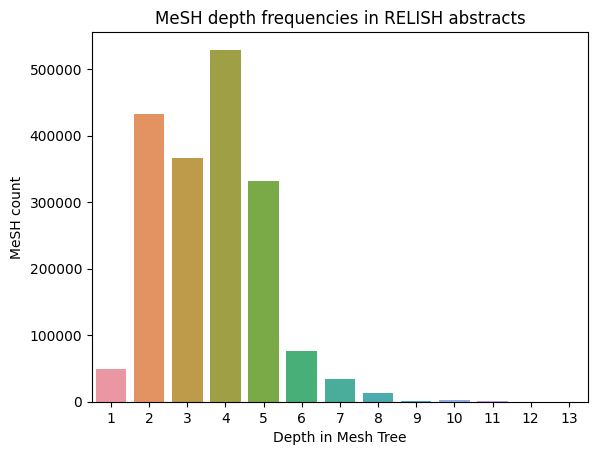

In [18]:
i = 0
Depth_vs_freq = {}
for node_id in big_G.nodes:
    if(node_id in big_G_nodes and MeSH_cnt[node_id] != 0):
        dpth = big_G.nodes[node_id]["Depth"]
        freq = big_G.nodes[node_id]["Frequency_Pubmed"]
        if(dpth in Depth_vs_freq): Depth_vs_freq[dpth] += freq
        else: Depth_vs_freq[dpth] = freq        
        i+=1
    # if(i == 20): break

sortedKeys = list(Depth_vs_freq.keys())
sortedKeys.sort()
Depth_vs_freq = {i: Depth_vs_freq[i] for i in sortedKeys}

df_Depth_vs_freq = pd.DataFrame()
df_Depth_vs_freq['Depth in Mesh Tree'] = list(Depth_vs_freq.keys())
df_Depth_vs_freq['MeSH count'] = list(Depth_vs_freq.values())

print(df_Depth_vs_freq)
sns.barplot(df_Depth_vs_freq, x="Depth in Mesh Tree", y="MeSH count").set(title='MeSH depth frequencies in RELISH abstracts')